## Downloading EO Polygons with PC

In [1]:
# install with
# !pip install terragon-downloader[pc]

In [2]:
import terragon
import geopandas as gpd
import xarray as xr
from utils import visualize_sat_images

In [3]:
# we will use the sample data to download a minicube
# other datasets can be found here: https://planetarycomputer.microsoft.com/catalog 
gdf = gpd.read_file("data/TUM_OTN.geojson")
gdf = gdf.to_crs('EPSG:32632')
arguments = dict(shp=gdf,
                collection='sentinel-2-l2a',
                start_date='2021-01-01',
                end_date='2021-01-05',
                bands=['B02', 'B03', 'B04'],
                resolution=10,
                download_folder='tests/download/'
)
gdf.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

download

In [4]:
tg = terragon.init('pc') # credentials are not needed for public datasets

In [5]:
# planetary computer is accessed via the stac catalog
ds = tg.create(**arguments)
# or 
# items = tg.search(**arguments)
# ds = tg.download(items)
ds

<xarray.Dataset> Size: 12kB
Dimensions:      (y: 18, x: 27, time: 2)
Coordinates:
  * y            (y) float64 144B 5.326e+06 5.326e+06 ... 5.326e+06 5.326e+06
  * x            (x) float64 216B 6.976e+05 6.976e+05 ... 6.979e+05 6.979e+05
  * time         (time) datetime64[ns] 16B 2021-01-01T10:23:29.024000 2021-01...
    spatial_ref  int64 8B 0
Data variables:
    B02          (time, y, x) float32 4kB nan nan nan nan ... nan nan nan nan
    B03          (time, y, x) float32 4kB nan nan nan nan ... nan nan nan nan
    B04          (time, y, x) float32 4kB nan nan nan nan ... nan nan nan nan
Attributes:
    crs:          EPSG:32632
    data_source:  PC
    collection:   sentinel-2-l2a

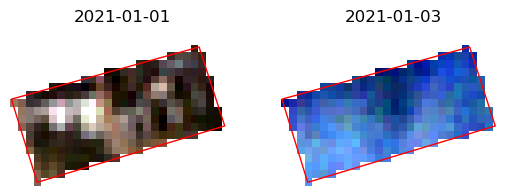

In [6]:
visualize_sat_images(ds, gdf, list(reversed(arguments['bands'])))

In [7]:
# the ouptut of the search is a collection of items
tg.search(**arguments)

you can filter for more criteria in the meta data, for example cloud cover:

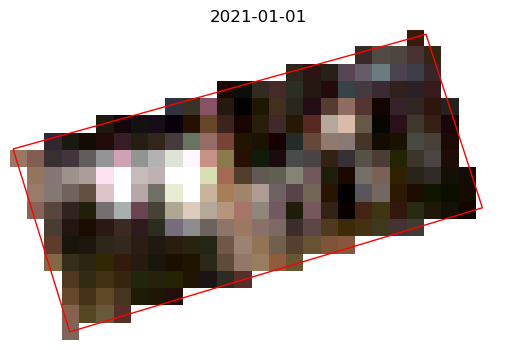

In [8]:
ds = tg.create(**arguments, filter={"eo:cloud_cover": {"lt":95}})
visualize_sat_images(ds, gdf, list(reversed(arguments['bands'])))